In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.drop(['society', 'balcony', 'availability'], axis=1, inplace=True)

In [5]:
print("Missing values before:", df.isnull().sum())
df.dropna(inplace=True)
print("Shape after removing nulls:", df.shape)


Missing values before: area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64
Shape after removing nulls: (13246, 6)


In [6]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df[['size', 'bhk']].head()


,size,bhk
0,2 BHK,2
1,4 Bedroom,4
2,3 BHK,3
3,3 BHK,3
4,2 BHK,2


In [7]:
def convert_sqft(x):
    try:
        if '-' in x:
            a, b = x.split('-')
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'], inplace=True)


In [8]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df[['location', 'total_sqft', 'price', 'price_per_sqft']].head()


,location,total_sqft,price,price_per_sqft
0,Electronic City Phase II,1056.0,39.07,3699.810606
1,Chikka Tirupathi,2600.0,120.00,4615.384615
2,Uttarahalli,1440.0,62.00,4305.555556
3,Lingadheeranahalli,1521.0,95.00,6245.890861
4,Kothanur,1200.0,51.00,4250.000000


In [9]:
print("Number of unique locations:", df['location'].nunique())
print("Top 10 locations:\n", df['location'].value_counts().head(10))


Number of unique locations: 1298
Top 10 locations:
 location
Whitefield               532
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           264
Thanisandra              232
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: count, dtype: int64


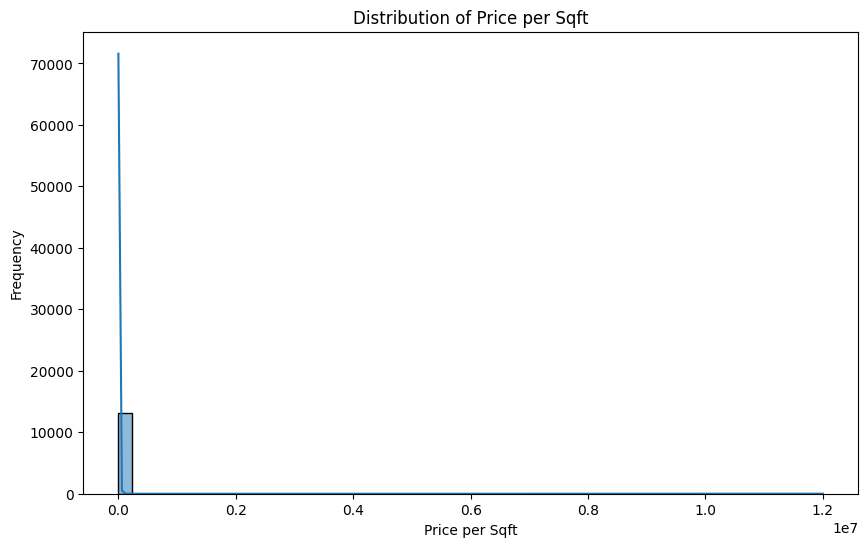

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Distribution of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()


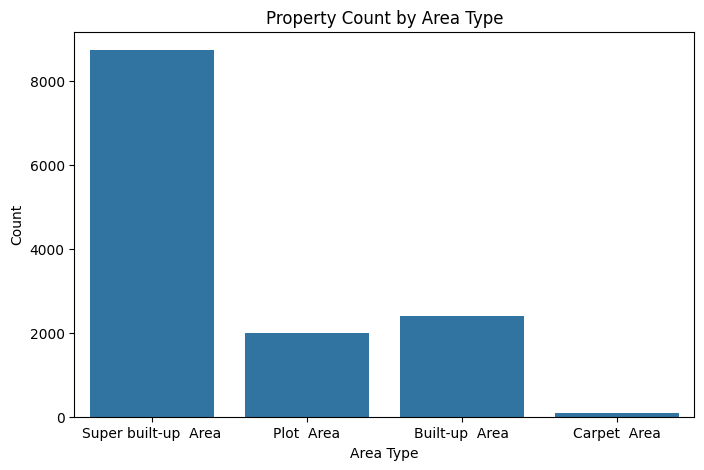

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='area_type')
plt.title("Property Count by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Count")
plt.show()


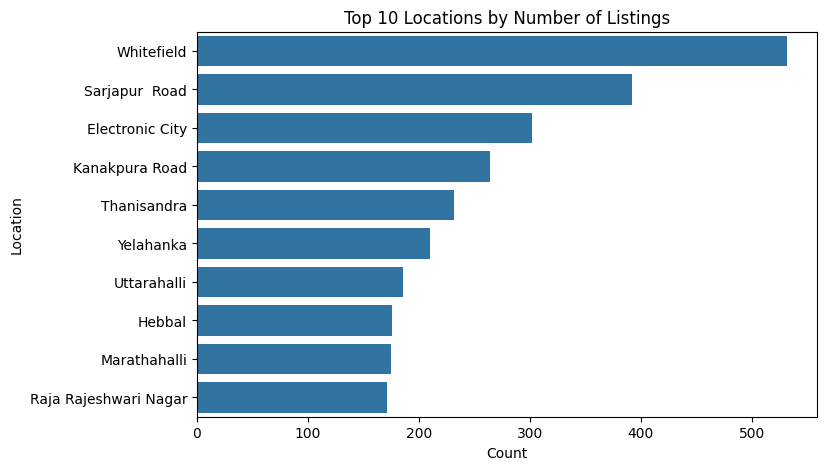

In [12]:
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Locations by Number of Listings")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


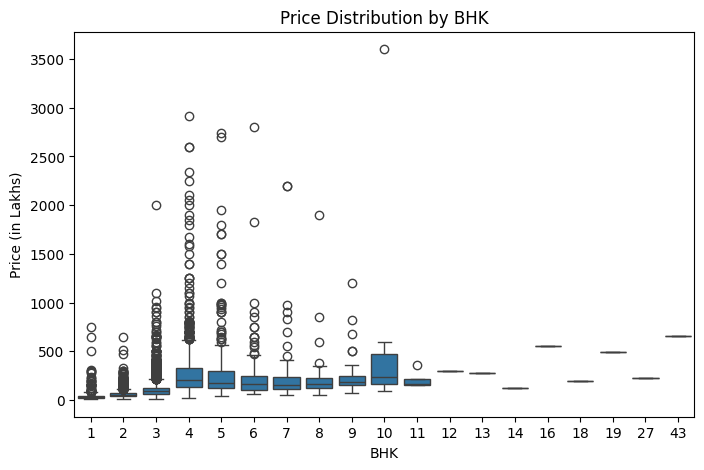

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='bhk', y='price', data=df)
plt.title("Price Distribution by BHK")
plt.xlabel("BHK")
plt.ylabel("Price (in Lakhs)")
plt.show()
